Time Series Employment Analysis of NAICS




*   Importimg The Libraries






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Reading The Data 

In [3]:
data= pd.read_csv('/content/RTRA_Employ_2NAICS_00_05.csv')
data.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [4]:
data_2d=['/content/RTRA_Employ_2NAICS_97_99.csv','/content/RTRA_Employ_2NAICS_00_05.csv','/content/RTRA_Employ_2NAICS_06_10.csv',
         '/content/RTRA_Employ_2NAICS_11_15.csv','/content/RTRA_Employ_2NAICS_16_20.csv']

In [5]:
data_3d=['/content/RTRA_Employ_3NAICS_97_99.csv','/content/RTRA_Employ_3NAICS_00_05.csv','/content/RTRA_Employ_3NAICS_06_10.csv',
         '/content/RTRA_Employ_3NAICS_11_15.csv','/content/RTRA_Employ_3NAICS_16_20.csv']

In [6]:
data_4d=['/content/RTRA_Employ_4NAICS_97_99.csv','/content/RTRA_Employ_4NAICS_00_05.csv','/content/RTRA_Employ_4NAICS_06_10.csv',
         '/content/RTRA_Employ_4NAICS_11_15.csv','/content/RTRA_Employ_4NAICS_16_20.csv']

In [8]:
d2_dataframe=pd.DataFrame()
d3_dataframe=pd.DataFrame()
d4_dataframe=pd.DataFrame()

combining data

In [9]:
for i in data_2d:
    d2 = pd.read_csv(i)
    d2_dataframe = pd.concat([d2_dataframe,d2], ignore_index=True)

In [11]:
for i in data_3d:
    d3= pd.read_csv(i)
    d3_dataframe = pd.concat([d3_dataframe,d3], ignore_index=True)

In [12]:
for i in data_4d:
    d4 = pd.read_csv(i)
    d4_dataframe = pd.concat([d4_dataframe,d4], ignore_index=True)

show the data 

In [13]:
d2_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000


In [14]:
d2_dataframe.info()
d2_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         5472 non-null   int64 
 1   SMTH          5472 non-null   int64 
 2   NAICS         5472 non-null   object
 3   _EMPLOYMENT_  5472 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.1+ KB


(5472, 4)

In [15]:
d3_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000


In [16]:
d3_dataframe.info()
d3_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56280 entries, 0 to 56279
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         56280 non-null  int64 
 1   SMTH          56280 non-null  int64 
 2   NAICS         56280 non-null  object
 3   _EMPLOYMENT_  56280 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


(56280, 4)

In [17]:
d4_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


In [18]:
d4_dataframe.info()
d4_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85572 entries, 0 to 85571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SYEAR         85572 non-null  int64
 1   SMTH          85572 non-null  int64
 2   NAICS         85572 non-null  int64
 3   _EMPLOYMENT_  85572 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


(85572, 4)

Extract Code Function

In [19]:

def extractCode(df):
    df['code'] = df.NAICS.str.extract(r'\[(.+)\]', expand=False)
    df['code'] = df.code.str.replace('-', ',').astype('str')
    df['code'] = df.code.str.split(',')
    return df

Extract Code From NAICS coloumn in D2 & D3  Data

In [20]:
d2_dataframe = extractCode(d2_dataframe)
d2_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code
0,1997,1,Accommodation and food services [72],129250,[72]
1,1997,1,"Administrative and support, waste management a...",58500,[56]
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250,[11]
3,1997,1,"Arts, entertainment and recreation [71]",38750,[71]
4,1997,1,Construction [23],118000,[23]


In [21]:
d3_dataframe = extractCode(d3_dataframe)
d3_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code
0,1997,1,Aboriginal public administration[914],500,[914]
1,1997,1,Accommodation services[721],24000,[721]
2,1997,1,Administrative and support services[561],56750,[561]
3,1997,1,Air transportation[481],17000,[481]
4,1997,1,Ambulatory health care services[621],40000,[621]


Get the Date 


In [24]:
def Getdate(df):
  df['date'] = pd.to_datetime(df.SYEAR.astype('str') + df.SMTH.astype('str'), format='%Y%m')
  df= df.sort_values('date')
  return df

In [25]:
d2_dataframe = Getdate(d2_dataframe)
d2_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code,date
0,1997,1,Accommodation and food services [72],129250,[72],1997-01-01
19,1997,1,Wholesale trade [41],72000,[41],1997-01-01
18,1997,1,Utilities [22],9750,[22],1997-01-01
17,1997,1,Transportation and warehousing [48-49],107000,"[48, 49]",1997-01-01
16,1997,1,Retail trade [44-45],224000,"[44, 45]",1997-01-01


In [26]:
d3_dataframe = Getdate(d3_dataframe)
d3_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code,date
0,1997,1,Aboriginal public administration[914],500,[914],1997-01-01
28168,1997,1,Food and beverage stores[445],54250,[445],1997-01-01
28169,1997,1,Food manufacturing[311],21500,[311],1997-01-01
28170,1997,1,Food services and drinking places[722],105250,[722],1997-01-01
28171,1997,1,"Food, beverage and tobacco merchant wholesaler...",16750,[413],1997-01-01


In [29]:
d4_dataframe = Getdate(d4_dataframe)
d4_dataframe.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,date
0,1997,1,1100,3500,1997-01-01
211,1997,1,5172,3250,1997-01-01
231,1997,1,5323,0,1997-01-01
209,1997,1,5151,4750,1997-01-01
208,1997,1,5122,500,1997-01-01


 Explore LMO_Detailed_Industries_by_NAICS



In [22]:
d=pd.read_excel('/content/LMO_Detailed_Industries_by_NAICS.xlsx')
d.head()


,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [23]:
d.info()
d.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


(59, 2)

In [34]:
d['NAICS'] = d['NAICS'].replace(regex='&', value=',').astype('str')



map the code coloumn in LMO_Detailed_Industry



In [36]:
industry_dic = {
    'two_dic' : {}, 
    'three_dic' : {}, 
    'four_dic' : {}
}


In [37]:
code = []
for name, numbers in zip(d['LMO_Detailed_Industry'], d['NAICS']):
    num_list = numbers.split(',')
    num_list = [x.strip() for x in num_list]
    code.append(num_list)
    for i in range(len(num_list)):
        if len(num_list[i]) == 2:
            industry_dic['two_dic'][num_list[i]] = name
        elif len(num_list[i]) == 3:
            industry_dic['three_dic'][num_list[i]] = name 
        elif len(num_list[i]) == 4:
            industry_dic['four_dic'][num_list[i]] = name
d['code'] = code

 take required rows from the industry tables


In [43]:
d4_dataframe['code'] = d4_dataframe.NAICS.astype('str')

In [41]:
def check(i, df1, df2):
    j = 0
    for r in df1.itertuples():
        if i in r.code:
            df2 = pd.concat([df2, df1.loc[j]], axis =1)
        j += 1
    return df2

In [67]:
df_2d = pd.DataFrame()
df_3d = pd.DataFrame()
df_4d = pd.DataFrame()
for l in d['code']:
    for i in l:
        if len(i) == 2:
            df_2d = check(i, d2_dataframe, df_2d)
        elif len(i) == 3:
            df_3d = check(i, d3_dataframe, df_3d)
        elif len(i) ==4:
            df_4d = check(i, d4_dataframe, df_4d)
df_2d = df_2d.transpose()
df_3d = df_3d.transpose()
df_4d = df_4d.transpose()

Get industry name by using code 


In [68]:
def GetName(df):
    df['code'] = df['code'].map(lambda x:x[0])
    x = df['code'].iloc[-1]
    if len(x) == 2:
        df['name'] = df['code'].map(industry_dic['two_dic'])
    elif len(x) == 3:
        df['name'] = df['code'].map(industry_dic['three_dic'])
    return df

In [69]:
df_2d = GetName(df_2d)
df_3d = GetName(df_3d)




In [74]:
df_4d['name'] = df_4d['code'].map(industry_dic['four_dic'])


In [81]:
df_4d.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,date,code,name
247,1997,1,5615,8250,1997-01-01,5615,NaN
557,1997,2,5616,12000,1997-02-01,5616,NaN
876,1997,3,6115,0,1997-03-01,6115,Private and trades education
1175,1997,4,5616,13000,1997-04-01,5616,NaN
1483,1997,5,5615,8250,1997-05-01,5615,NaN


In [ ]:
df_2d.drop(columns = ['SYEAR','SMTH', 'NAICS'], inplace = True)


In [87]:
df_2d.head()

,_EMPLOYMENT_,code,date,name
2,62250,11,1997-01-01,NaN
26,76750,52,1997-02-01,NaN
46,79000,52,1997-03-01,NaN
61,61000,56,1997-04-01,"Business, building and other support services"
86,83000,52,1997-05-01,NaN


In [83]:
df_3d.drop(columns = ['SYEAR','SMTH', 'NAICS'], inplace = True)

In [88]:
df_3d.head()

,_EMPLOYMENT_,code,date,name
44,250,316,1997-01-01,Other manufacturing
159,5000,415,1997-02-01,NaN
251,0,533,1997-03-01,NaN
353,500,316,1997-04-01,Other manufacturing
454,28000,524,1997-05-01,Insurance carriers and related activities


In [84]:
df_4d.drop(columns = ['SYEAR','SMTH', 'NAICS'], inplace = True)

In [89]:
df_4d.head()

,_EMPLOYMENT_,date,code,name
247,8250,1997-01-01,5615,NaN
557,12000,1997-02-01,5616,NaN
876,0,1997-03-01,6115,Private and trades education
1175,13000,1997-04-01,5616,NaN
1483,8250,1997-05-01,5615,NaN


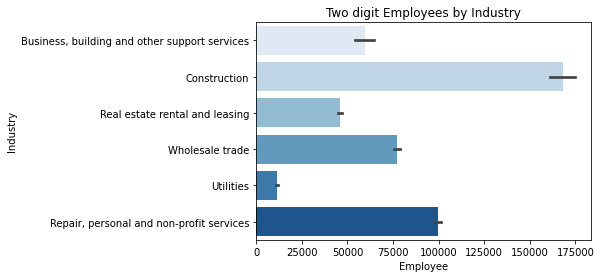

In [102]:
sns.barplot(x='_EMPLOYMENT_', y='name', data=df_2d,palette = "Blues")
plt.title('Two digit Employees by Industry')
plt.xlabel('Employee')
plt.ylabel('Industry')
plt.show()

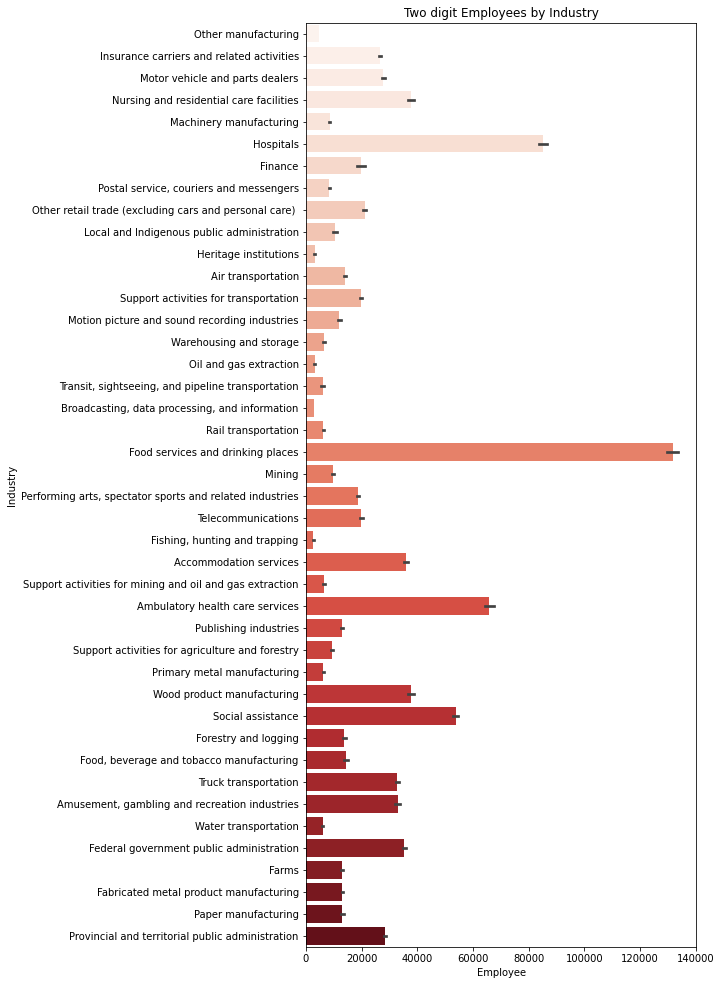

In [104]:
plt.figure(figsize=(7,17))
sns.barplot(x='_EMPLOYMENT_', y='name', data=df_3d,palette = "Reds")
plt.title('Two digit Employees by Industry')
plt.xlabel('Employee')
plt.ylabel('Industry')
plt.show()

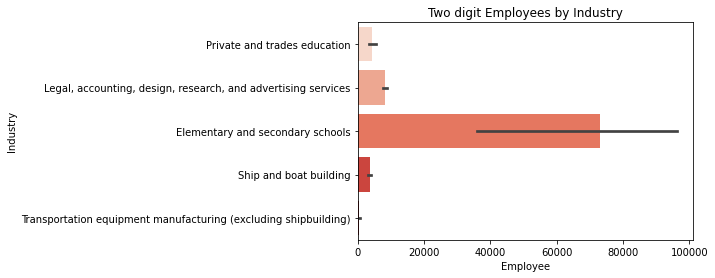

In [124]:

sns.barplot(x='_EMPLOYMENT_', y='name', data=df_4d,palette = "Reds")
plt.title('Two digit Employees by Industry')
plt.xlabel('Employee')
plt.ylabel('Industry')
plt.show()

merge all tables in only one table 

In [139]:
merge_data = pd.concat([df_2d, df_3d, df_4d])
merge_data.set_index('date', inplace=True)

drop Nan Value

In [157]:
merge_data = merge_data.dropna(axis=0, how='any')

In [158]:
merge_data.head()

,_EMPLOYMENT_,code,name
date,,,
1997-04-01,61000,56,"Business, building and other support services"
1997-06-01,63750,56,"Business, building and other support services"
1997-07-01,62000,56,"Business, building and other support services"
1997-08-01,750,55,"Business, building and other support services"
1998-01-01,57250,56,"Business, building and other support services"


In [161]:
merge_data.groupby(['name','_EMPLOYMENT_'], as_index=False).sum()

,name,_EMPLOYMENT_,code
0,Accommodation services,0,721721721721721721
1,Accommodation services,22000,721721
2,Accommodation services,23000,721721
3,Accommodation services,24000,721721
4,Accommodation services,24250,721
...,...,...,...
3917,Wood product manufacturing,55000,321
3918,Wood product manufacturing,55750,321321
3919,Wood product manufacturing,56000,321321
3920,Wood product manufacturing,56250,321321


In [163]:
merge_data["Employment"] = merge_data["_EMPLOYMENT_"].astype(np.int)
merge_data.head()

,_EMPLOYMENT_,code,name,Employment
date,,,,
1997-04-01,61000,56,"Business, building and other support services",61000
1997-06-01,63750,56,"Business, building and other support services",63750
1997-07-01,62000,56,"Business, building and other support services",62000
1997-08-01,750,55,"Business, building and other support services",750
1998-01-01,57250,56,"Business, building and other support services",57250


In [165]:
industry_summary = merge_data.groupby(["name"])["Employment"].sum()
industry_summary.head()

name
Accommodation services                            14715000
Air transportation                                 5946000
Ambulatory health care services                   27552500
Amusement, gambling and recreation industries     13087500
Broadcasting, data processing, and information     3661250
Name: Employment, dtype: int64

Text(0.5, 1.0, ' Top 10 Industries Bar plot')

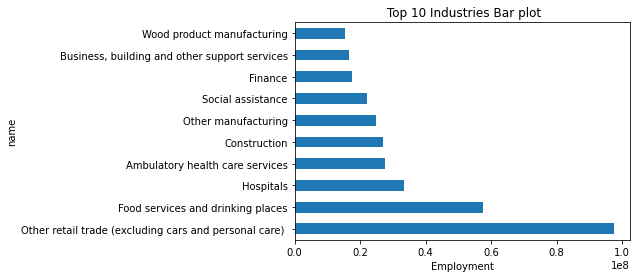

In [168]:
industry_summary.sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel("Employment")
plt.title(" Top 10 Industries Bar plot")

In [171]:
retail_trade = merge_data[merge_data["name"] == "Other retail trade(excluding cars and personal care)"]
food = merge_data[merge_data['name']=='Food services and drinking places']
hospital=merge_data[merge_data['name']=='Hospitals']

In [176]:
food.head()

,_EMPLOYMENT_,code,name,Employment
date,,,,
2002-08-01,126750,722,Food services and drinking places,126750
2006-10-01,138750,722,Food services and drinking places,138750
2015-05-01,154500,722,Food services and drinking places,154500
1998-08-01,119250,722,Food services and drinking places,119250
1999-08-01,118500,722,Food services and drinking places,118500


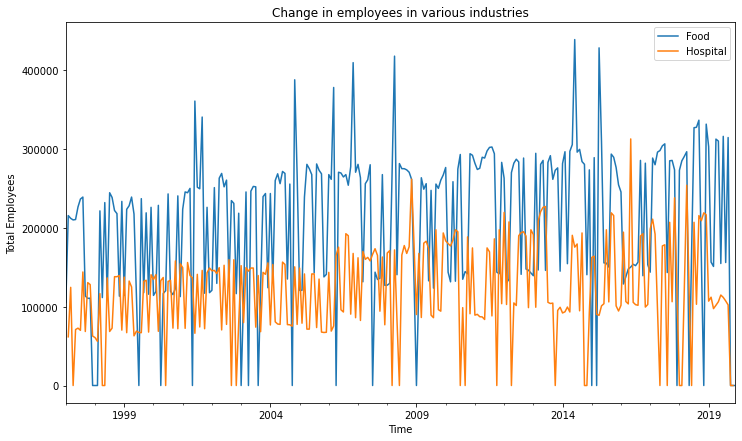

In [179]:

plt.subplots(figsize=(12,7))

food.resample('M')['Employment'].sum().plot(label='Food')
hospital.resample('M')['Employment'].sum().plot(label='Hospital')
plt.title('Change in employees in various industries')
plt.ylabel('Total Employees')
plt.xlabel('Time')
plt.legend()
plt.show()
